In [2]:
import numpy as np
import scipy
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
test_dir = 'FER-2013/test'  
train_dir = 'FER-2013/train'   

In [4]:
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    brightness_range =[0.8,1.2],
    shear_range = 0.15,
    horizontal_flip=True
)

datagen_val = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = datagen_train.flow_from_directory(
    train_dir,
    target_size=(48, 48),    # FER images are typically 48x48
    color_mode='grayscale',  # Convert to grayscale for simplicity
    batch_size=64,
    class_mode='categorical'
)

val_generator = datagen_val.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
# Custom CNN
model = Sequential([
    Conv2D(256, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(7, activation='softmax')  # Adjust if there are more/less classes
])

2024-12-26 09:48:44.221338: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11541 MB memory:  -> device: 0, name: NVIDIA TITAN Xp, pci bus id: 0000:19:00.0, compute capability: 6.1
2024-12-26 09:48:44.221947: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 11541 MB memory:  -> device: 1, name: NVIDIA TITAN Xp, pci bus id: 0000:1a:00.0, compute capability: 6.1
2024-12-26 09:48:44.222429: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 11541 MB memory:  -> device: 2, name: NVIDIA TITAN Xp, pci bus id: 0000:67:00.0, compute capability: 6.1
2024-12-26 09:48:44.222907: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 11533 MB memory:  -> device: 3, name: NVIDIA TITAN Xp, pci bus id: 0000:68:00.0, comp

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 256)       2560      
                                                                 
 batch_normalization (Batch  (None, 46, 46, 256)       1024      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 256)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       295040    
                                                                 
 batch_normalization_1 (Bat  (None, 21, 21, 128)       5

In [9]:
history = model.fit(train_generator, validation_data=val_generator, epochs=200, verbose=1)

Epoch 1/200


2024-12-26 09:48:51.107385: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-12-26 09:48:51.395011: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-12-26 09:48:51.674956: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fab2303a550 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-26 09:48:51.674981: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA TITAN Xp, Compute Capability 6.1
2024-12-26 09:48:51.674987: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA TITAN Xp, Compute Capability 6.1
2024-12-26 09:48:51.674991: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (2): NVIDIA TITAN Xp, Compu

449/449 [==============================] - 30s 59ms/step - loss: 2.2238 - accuracy: 0.1913 - val_loss: 1.8085 - val_accuracy: 0.2471
Epoch 2/200
398/449 [=========================>....] - ETA: 2s - loss: 1.8578 - accuracy: 0.2309

KeyboardInterrupt: 

In [10]:
model.save("v1.h5")

/home/deeptimaan/.conda/envs/venv-p39-tf2/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


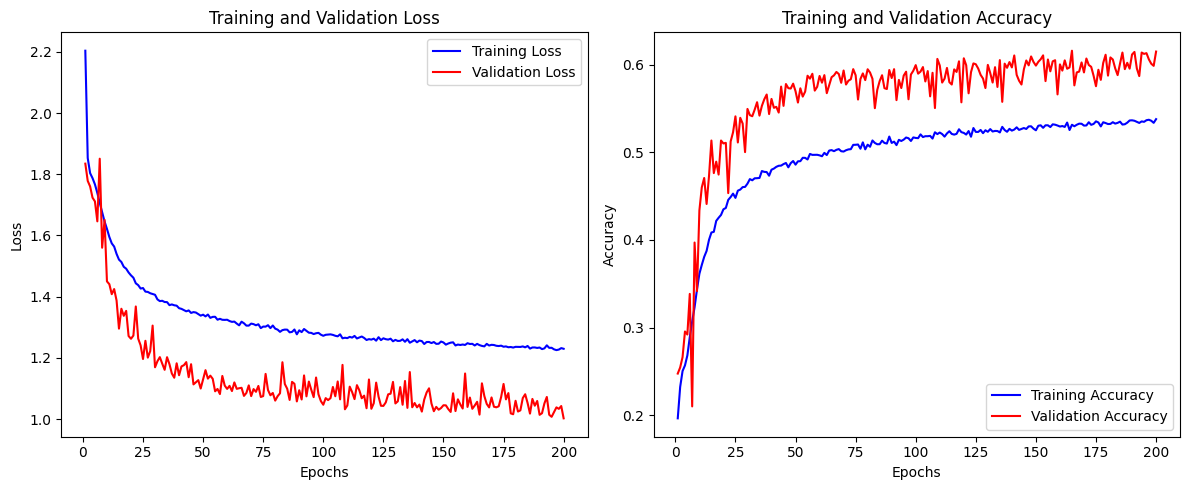

In [12]:
import matplotlib.pyplot as plt

# Extract data from history
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

# Get the number of epochs
epochs = range(1, len(loss) + 1)

# Plot loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()
